In [1]:
from datetime import datetime
from MetaTrader5 import *
MT5Initialize()
MT5WaitForTerminal()

print(MT5TerminalInfo())
print(MT5Version())

[2, 'MetaQuotes-Demo', '21592194']
[500, 2230, '18 Nov 2019']


In [2]:
rates = MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_D1, datetime(1971,1,1), datetime(2019,11,21))

In [3]:
import pandas as pd
d = pd.DataFrame(list(rates),
                           columns=['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'])

In [4]:
d['median']=(d['high']+d['low'])/2

In [5]:
d['delta'] = d['median'].diff(1).fillna(0)

In [6]:
d

,time,open,high,low,close,tick_volume,spread,real_volume,median,delta
0,1971-01-04,0.53690,0.53690,0.53690,0.53690,1,50,0,0.536900,0.000000
1,1971-01-05,0.53660,0.53660,0.53660,0.53660,1,50,0,0.536600,-0.000300
2,1971-01-06,0.53650,0.53650,0.53650,0.53650,1,50,0,0.536500,-0.000100
3,1971-01-07,0.53680,0.53680,0.53680,0.53680,1,50,0,0.536800,0.000300
4,1971-01-08,0.53710,0.53710,0.53710,0.53710,1,50,0,0.537100,0.000300
...,...,...,...,...,...,...,...,...,...,...
12587,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0,1.100815,0.000040
12588,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0,1.103560,0.002745
12589,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0,1.106880,0.003320
12590,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0,1.107310,0.000430


<IPython.core.display.Javascript object>


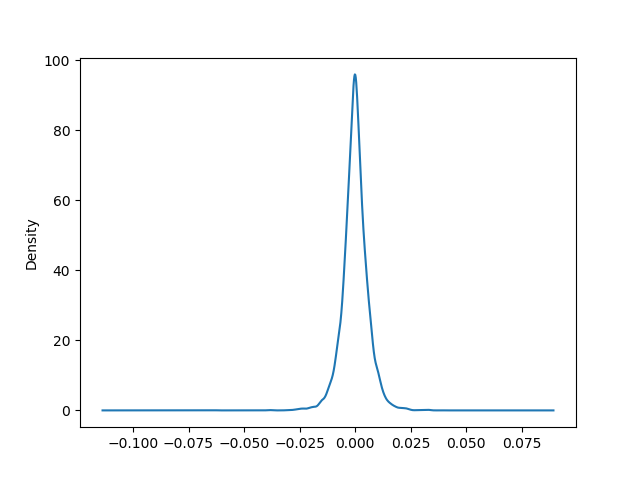

In [8]:
%matplotlib nbagg
d['delta'].plot.kde()